# 1. Filter by a Single Condition

# 1. 09-11 - Wrangling - filtering and grouping (Handout)

## Retrieval

Our dataset for this class is about alcohol consumption by secondary
school students. The data were obtained in a survey of students math and
portuguese language courses, in two schools, and can be found at
[Kaggle](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption/data).

Each row represents a student, and the columns are:

-   school - student’s school (binary: ‘GP’ - Gabriel Pereira or ‘MS’ -
    Mousinho da Silveira)
-   sex - student’s sex (binary: ‘F’ - female or ‘M’ - male)
-   age - student’s age (numeric: from 15 to 22)
-   address - student’s home address type (binary: ‘U’ - urban or ‘R’ -
    rural)
-   famsize - family size (binary: ‘LE3’ - less or equal to 3 or ‘GT3’ -
    greater than 3)
-   Pstatus - parent’s cohabitation status (binary: ‘T’ - living
    together or ‘A’ - apart)
-   Medu - mother’s education (numeric: 0 - none, 1 - primary education
    (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 –
    higher education)
-   Fedu - father’s education (numeric: 0 - none, 1 - primary education
    (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 –
    higher education)
-   Mjob - mother’s job (nominal: ‘teacher’, ‘health’ care related,
    civil ‘services’ (e.g. administrative or police), ‘at_home’ or
    ‘other’)
-   Fjob - father’s job (nominal: ‘teacher’, ‘health’ care related,
    civil ‘services’ (e.g. administrative or police), ‘at_home’ or
    ‘other’)
-   reason - reason to choose this school (nominal: close to ‘home’,
    school ‘reputation’, ‘course’ preference or ‘other’)
-   guardian - student’s guardian (nominal: ‘mother’, ‘father’ or
    ‘other’)
-   traveltime - home to school travel time (numeric: 1 - \<15 min., 2 -
    15 to 30 min., 3 - 30 min. to 1 hour, or 4 - \>1 hour)
-   studytime - weekly study time (numeric: 1 - \<2 hours, 2 - 2 to 5
    hours, 3 - 5 to 10 hours, or 4 - \>10 hours)
-   failures - number of past class failures (numeric: n if 1\<=n\<3,
    else 4)
-   schoolsup - extra educational support (binary: yes or no)
-   famsup - family educational support (binary: yes or no)
-   paid - extra paid classes within the course subject (Math or
    Portuguese) (binary: yes or no)
-   activities - extra-curricular activities (binary: yes or no)
-   nursery - attended nursery school (binary: yes or no)
-   higher - wants to take higher education (binary: yes or no)
-   internet - Internet access at home (binary: yes or no)
-   romantic - with a romantic relationship (binary: yes or no)
-   famrel - quality of family relationships (numeric: from 1 - very bad
    to 5 - excellent)
-   freetime - free time after school (numeric: from 1 - very low to 5 -
    very high)
-   goout - going out with friends (numeric: from 1 - very low to 5 -
    very high)
-   Dalc - workday alcohol consumption (numeric: from 1 - very low to
    5 - very high)
-   Walc - weekend alcohol consumption (numeric: from 1 - very low to
    5 - very high)
-   health - current health status (numeric: from 1 - very bad to 5 -
    very good)
-   absences - number of school absences (numeric: from 0 to 93)
-   G1 - first period grade (numeric: from 0 to 20)
-   G2 - second period grade (numeric: from 0 to 20)
-   G3 - final grade (numeric: from 0 to 20, output target)

Let’s retrieve what we learned last time:

------------------------------------------------------------------------

-   Load the CSV file (`student-mat.csv`) into a Pandas DataFrame named
    `students`.

------------------------------------------------------------------------

-   Select and display the data for the student at index 5.

------------------------------------------------------------------------

-   Select and display the G3 column (final grade) for all students.

------------------------------------------------------------------------

-   Create a new column named `total_grade` which is the sum of G1 and
    G2 and display the first few rows.

------------------------------------------------------------------------

-   Sort the DataFrame by age in ascending order and display the first
    few rows.

------------------------------------------------------------------------

-   Calculate and display the mean of the G3 column (final grade).

# 2. Filtering

In [2]:
# Filter rows where 'age' is greater than 18
students_age_filtered = students[students['age'] > 18]
students_age_filtered.head()

5 rows × 33 columns

------------------------------------------------------------------------

-   In the same way, let’s now filter rows where ‘G3’ is greater than
    15.

## 2. Filter by Multiple Conditions

In [3]:
# Filter rows where 'age' > 18 and 'G3' > 15
students_multiple_conditions = students[(students['age'] > 18) & (students['G3'] > 15)]
students_multiple_conditions.head()

1 rows × 33 columns

------------------------------------------------------------------------

-   In the same way, let’s now filter rows where ‘age’ \<= 18 OR
    ‘studytime’ = 4.

## 3. Filter by Categorical Column

In [4]:
# Filter rows where 'school' is 'GP'
students_school_gp = students[students['school'] == 'GP']
students_school_gp.head()

5 rows × 33 columns

------------------------------------------------------------------------

-   In the same way, let’s now filter rows where ‘activities’
    (extra-curricular activities) is ‘yes’.

## Filtering with the `query()` method

### 1. **Filter with `query()` Method**

In [5]:
# Filter using query method
students_query = students.query("famsize == 'GT3' and famsup == 'no'")
students_query.head()

5 rows × 33 columns

------------------------------------------------------------------------

-   In the same way, let’s now filter rows where `failures < 2` and
    `higher == yes`.

## Key Points

-   **Single Condition**: Use simple boolean conditions for basic
    filtering.
-   **Multiple Conditions**: Combine conditions using `&` (and) or `|`
    (or) operators.
-   **`query()` Method**: Use `query()` for a more readable and
    expressive way to filter.

# 3. Grouping / Aggregating

## Why?

-   Quickly compute summary statistics (e.g., mean, sum, count) across
    different categories or groups.

-   Thus, we can identify trends, patterns, or differences between
    groups.

-   Main idea:

    1.  *Split* the data in groups
    2.  *Apply* some operation (count, sum, mean, etc)
    3.  *Combine* again in a new dataframe.

## Example 1: Calculate mean of final grade (`G3`) for each school

-   Let’s group by school:

In [6]:
# Group by 'school' and calculate mean of 'G3'
students_grouped_school = students.groupby('school')
print(students_grouped_school)
print(type(students_grouped_school))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>

------------------------------------------------------------------------

What is the following code doing?

In [7]:
for school, group in students.groupby("school"):
  print(school, "has students with mean age", group["age"].mean())

GP has students with mean age 16.521489971346703
MS has students with mean age 18.02173913043478

## Checking group size

In [8]:
students.groupby("school").size()

school
GP    349
MS     46
dtype: int64

In [9]:
students.groupby(["school", "sex"]).size()

school  sex
GP      F      183
        M      166
MS      F       25
        M       21
dtype: int64

## Aggregating

In [10]:
students_by_school = (
  students
  .groupby("school", as_index=False)
  .agg(mean_G3=('G3', 'mean'))
)
students_by_school

## Lazy method

In [11]:
students.groupby(["school", "sex"])['G3'].mean()

school  sex
GP      F       9.972678
        M      11.060241
MS      F       9.920000
        M       9.761905
Name: G3, dtype: float64

-   Problem: not so easy to understand, and doesn’t set the right column
    name!

------------------------------------------------------------------------

Your turn: let’s now group by `sex` and calculate average age. Test the
more explicit and the more lazy methods.

## Grouping by multiple columns

In [12]:
# Group by 'school' and 'sex' and calculate mean of 'G3'
students_grouped_school_sex = (
    students
    .groupby(['school', 'sex'])
    .agg(mean_G3=('G3', 'mean'))
)
students_grouped_school_sex

## Custom Aggregation with `agg()`

In [13]:
# Custom aggregation functions
custom_agg = students.groupby('school')['G3'].agg(['mean', 'max', lambda x: x.mean() + 1])
print(custom_agg)

             mean  max  <lambda_0>
school                            
GP      10.489971   20   11.489971
MS       9.847826   19   10.847826

## Multiple functions with `agg()`

In [14]:
# Aggregation with multiple functions
multi_agg = students.groupby('school').agg({
  'age': ['mean', 'median'],
  'G3': ['mean', 'std', 'max']
})
print(multi_agg)

              age                G3              
             mean median       mean       std max
school                                           
GP      16.521490   16.0  10.489971  4.625397  20
MS      18.021739   18.0   9.847826  4.237229  19

# 4. Exploratory Data Analysis

## 

-   A first look at the dataset, in order to visualize and summarize
    their main characteristics
    -   Understand the data structure, detect patterns, identify
        anomalies, test hypotheses, and check assumptions.

------------------------------------------------------------------------

-   In our student dataset, we can ask, for example:
    -   What is the distribution of student ages?
    -   How many students are in each school (‘GP’ vs. ‘MS’)?
    -   Do male and female students have different average grades?
    -   How do grades vary based on the mother’s education level (Medu)?
    -   Does having internet access at home influence grades?
    -   What is the relationship between family educational support
        (famsup) and student performance?
    -   Does the family relationship quality (famrel) affect free time
        or study time?

------------------------------------------------------------------------

-   Let’s try to create some visualizations for these questions!

# 5. Love and visilibily

Hagar, who is Sarah’s Egyptian servant, flees into the desert after
mistreatment by Sarah. There, she encounters an angel of the Lord who
speaks to her and points to a fountain of water. In response to this
divine encounter, Hagar declares:

> “So she called the name of the Lord who spoke to her, ‘You are a God
> of seeing,’ for she said, ‘Truly here I have seen him who looks after
> me.’” — Genesis 16:13 (ESV)

------------------------------------------------------------------------

What if we understand data collection and dissemination as a form of
love and compassion?

> “The common gaze is surveillance for the common good, inflected with a
> preferential optic for those who are poor.” (Eric Stoddard, p. 41)

> “Corporations accumulate vast domains of new knowledge from us, but
> not for us.” (p. 11)

-   What is, instead of watching people, we could “watch for”, “watch
    with”, and “watch over” people?

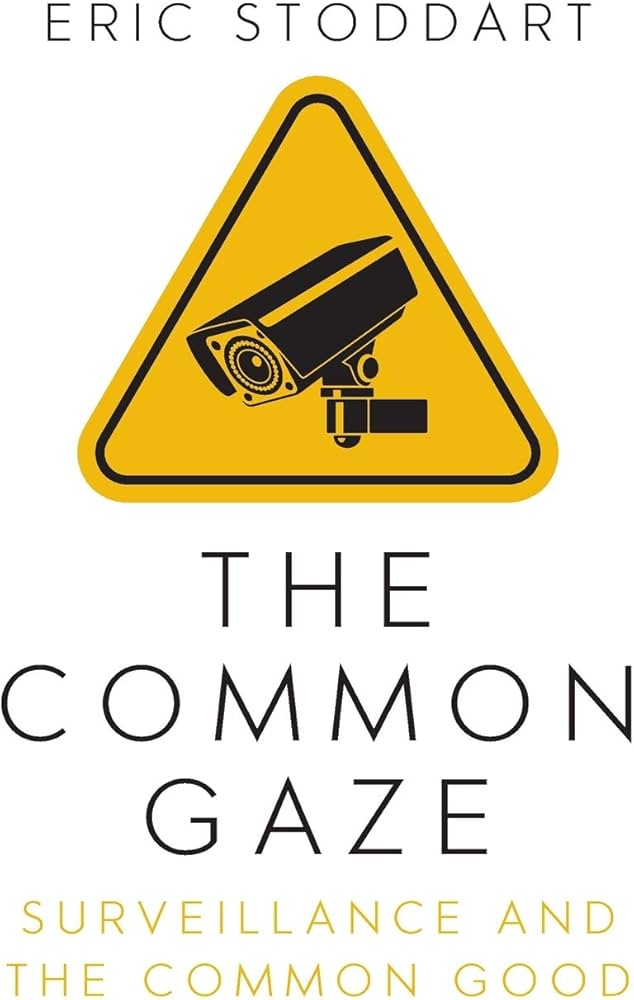

------------------------------------------------------------------------

-   Maybe we could call that “comveillance”: the practice of watching
    with one another in solidarity.
-   Privacy is not an absolute value: crime and injustice needs to be
    brought to light!
-   The question could be: **who is allowed to watch whom?**